## Algoritmide headuse hindamine - teooria
Sul on olemas tabel "predictions.csv", kus on kahe algoritmi pandud labelid ja tegelik label. 

Sinu ülesanne on otsustada, kumb algoritm on parem. Sa võid tabeli avada excelis, aga võid kasutada ka pythoni käske.

(Näiteks df[(df["A"] == 1) & (df["Actual"] == 1)] annab need read, kus algoritm A ennustas labeli 1 ja õige label oli ka 1)

In [44]:
# TODO
import pandas as pd

df = pd.read_csv("/Users/gustavtamkivi/Documents/Code/someschoolting/6. ylesanne/predictions - predictions.csv", index_col="ID")


print(len(df[(df["B"] == 1) & (df["Actual"] == 1)]))

53


## Confusion matrix

Olgu meil ülesanne jaotada asjad kahte gruppi (nt: inimene on haige vs inimene ei ole haige; makse on ebaseaduslik vs makse ei ole ebaseaduslik). Ja olgu meil kaks masinõppealgoritmi, mis on töö juba ära teinud. 

Kuidas hinnata, kumb annab parema tulemuse? Accuracy tihti ei anna kõige paremat pilti.


Confusion matrix on hea viis saada aru, kui hästi sinu masinõppe algoritm töötab. Selle abil me jaotame enda ennustused nelja gruppi:

1) Me arvasime, et väärtus on 1 ja tegelik väärtus on 1 (True Positive = TP)

2) Me arvasime, et väärtus on 0 ja tegelik väärtus on 0 (True Negative = TN)

3) Me arvasime, et väärtus on 1 ja tegelik väärtus on 0 (False Positive = FP) , Type I error

4) Me arvasime, et väärtus on 0 ja tegelik väärtus on 1 (False Negative = FN), Type II error


Meie eesmärk oleks, et TP ja TN osakaal oleks kõige suurem (ehk me teeme õigeid ennustusi). Ometigi aga olenevalt olukorrast võime endale nt FP ja FN olukorda endale lubada.

*näide*: FN on halb
- Kui meie masinõppe mudel ennustab analüüside põhjal, kas inimesel võib olla vähk või ei. Kui me arvame, et tal ei ole vähki aga tegelikult on (False Negative) - siis võib see saada inimese elule saatuslikuks.


- Kui meie masinõppe mudel ennustab, kas tegemist on rahapesuga või mitte, siis mingi hulk False Positive on täiesti õigustatud (ehk me palume üle vaadata makseid, mis tegelikult ei ole kahtlased). 

*näide* FP on halb
- Meie masinõppe mudel ennustab, kas inimene vajab operatsiooni või ei. Kui otsustame, et vajab operatsiooni, aga tegelikult ei vaja, võib kirurgia mõjuda inimese tervisele väga halvasti (kurnab organismi).

![Alt text](https://www.statisticssolutions.com/wp-content/uploads/2017/12/rachnovblog.jpg)

Loe rohkem selle kohta siin: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

## 1. ülesanne - täida _confusion matrix_



Algoritm A

| ACTUAL\PREDICTED | DISEASE (1) | NO DISEASE (0) | TOTAL |
|------------------|-------------|----------------|-------|
|    DISEASE (1)   |      68     |         32       |  100  |
|  NO DISEASE (0)  |      65     |        35      |   100  |
|        TOTAL     |      133     |        67     |   200 |


Algoritm B

| ACTUAL\PREDICTED | DISEASE (1) | NO DISEASE (0) | TOTAL |
|------------------|-------------|----------------|-------|
|    DISEASE (1)   |      53     |        ??      |   ??  |
|  NO DISEASE (0)  |      ??     |        78      |   ??  |
|        TOTAL     |      ??     |        ??      |   ??  |

## 2. ülesanne - accuracy, precision, recall

$$accuracy=\frac{\text{Number of correct predictions}}{\text{All predictions}}$$

$$precision=\frac{\text{True positives}}{\text{True positives + False positives}}$$

$$recall=\frac{\text{True positives}}{\text{True positives + False negatives}}$$




**Ülesanne** Arvuta kahe algoritmi accuracy, precision ja recall. Milline algoritm on sinu hinnangul parem?


## 3. ülesanne
Meil on kasutada kaks dataseti, mille peal saame treenida andmeid (genereeritud all pool). Eesmärk on hinnata, milline algoritm suudab kõige paremini tabada meie joonistatud kujundit. Algoritmid on ette antud, teiie ülesanne on  hinnata nende täpsust

In [3]:

import pandas as pd
import numpy as np
import matplotlib.patches as patches

x = np.random.uniform(-5,5,20)
y = np.random.uniform(-5,5,20)
label = (x-0)**2 +(y-0)**2<= 9

data = pd.DataFrame({'x':x,'y':y,'label':label})
data['label'] = data['label'].astype(int) # True and False into 1 0


x = np.random.uniform(-5,5,500)
y = np.random.uniform(-5,5,500)
label = (x-0)**2 +(y-0)**2<= 9
data2 = pd.DataFrame({'x':x,'y':y,'label':label})
data2['label'] = data2['label'].astype(int) # True and False into 1 0

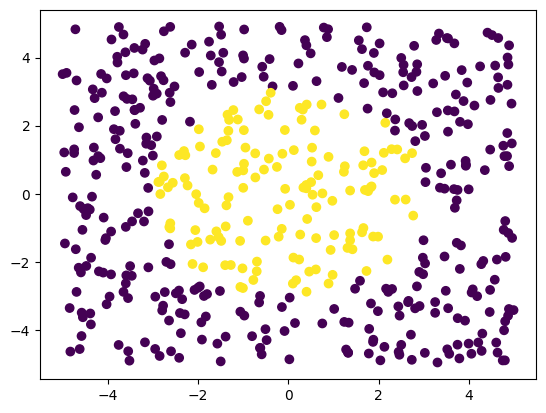

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data2["x"],data2["y"],c =data2["label"])

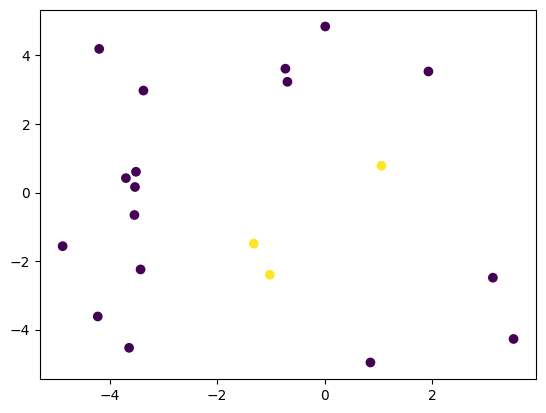

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data["x"],data["y"],c =data["label"])

In [6]:
# Seda koodi pead sa muutma ei pea, ainult pead jooksutama. 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

dt_1 = DecisionTreeClassifier(criterion='entropy', random_state = 0).fit(data[['x','y']], data['label'])
dt_2 = DecisionTreeClassifier(criterion='entropy', random_state = 0).fit(data2[['x','y']], data2['label'])

rf_1 = RandomForestClassifier(n_estimators=100,max_depth=4,random_state=0).fit(data[['x','y']], data['label'])
rf_2 = RandomForestClassifier(n_estimators=100,max_depth=4,random_state=0).fit(data2[['x','y']], data2['label'])


knn_1 =  KNeighborsClassifier(n_neighbors=2).fit(data[['x','y']], data['label'])
knn_2 =  KNeighborsClassifier(n_neighbors=2).fit(data2[['x','y']], data2['label'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

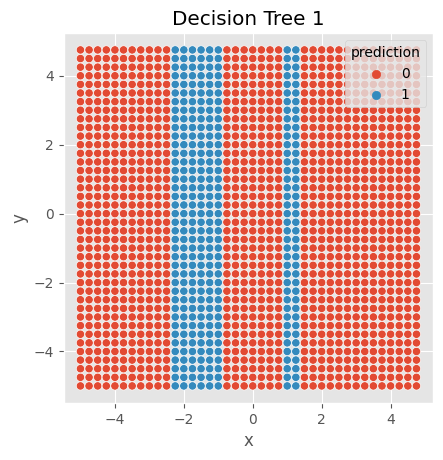

In [7]:
#Nüüd koostame dataseti, kus on ühtlaselt jaotatud punktid -5...5. 
plt.style.use('ggplot')
import seaborn as sns
#Koostame ruudustiku, kus on kõik punktid 0.25-se vahega
x = np.arange(-5,5,0.25)
y = np.arange(-5,5,0.25)
xx, yy = np.meshgrid(x, y)
df = pd.DataFrame({'x':xx.flatten(),'y':yy.flatten()})

#graafik
df['prediction'] = dt_1.predict(df[['x','y']])
plt.title('Decision Tree 1')
sns.scatterplot(x =df["x"], y=df["y"],hue = df["prediction"]).set_aspect('equal')

#Ülesanne: tee graafikut ülejäänud algoritmidest

In [ ]:
#Ülesanne: arvuta accuracy, precision ja recall.

#Label 1 peaks olema punktil, mis asub raadiusega 3 ringi sees (vaata kuidas on label data_2-s arvutatud)